# Optimization
---

__Optimization__: Choosing the best option from a set of options

The first alogirithm we'll look at is Local Search.

## Local Search
__Local Search__: Search algorithms that maintain a single node and searches by moving to a neighboring node. 

This is generally useful when we don't care about the path-- only the solution. In a maze, the solution is obvious. But local search will come up when defining what to goal looks like is the heart of the challenge.

For example, if we have a world of houses and hospitals... If we have a grid of houses, what's the best possible way we could place two hospitals?
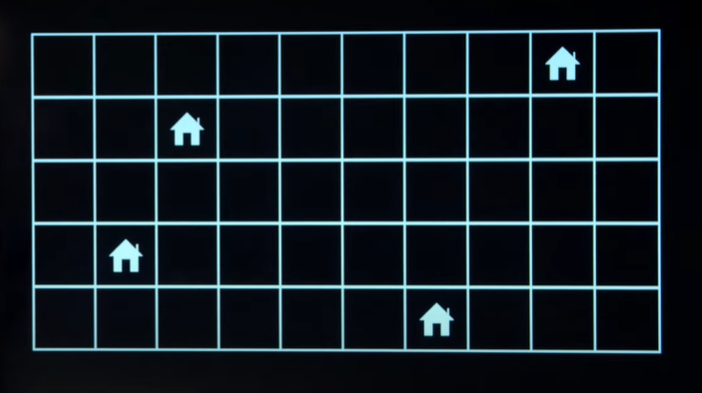
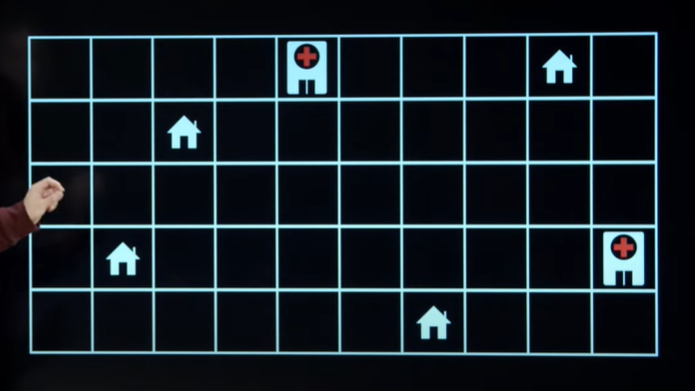

What's the best place to do this? Our objective can be to minimize the distance from the houses to the hospitals. 
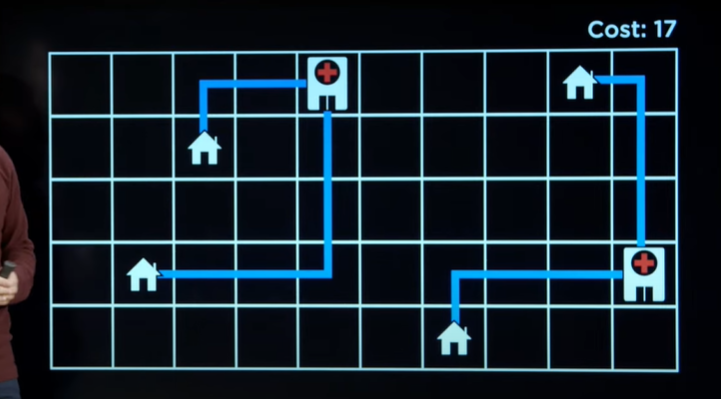

We can think of problems like this as a State-Space Landscape.
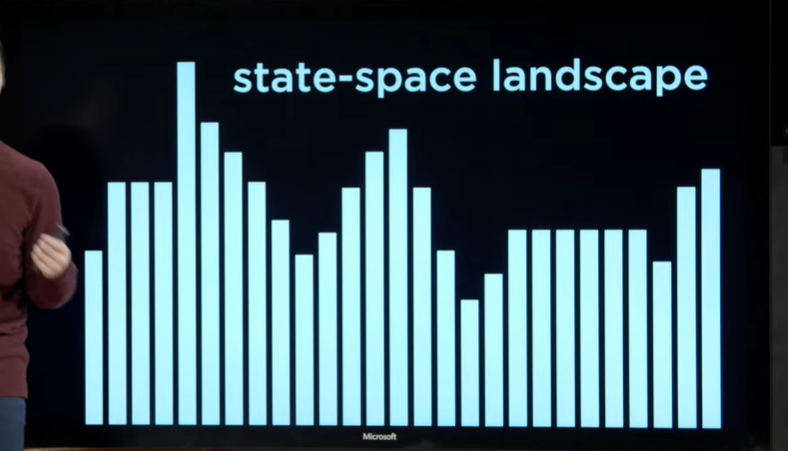
Each vertical bar represents 1 configuration of the 2 hospitals. The height of the vertical bar represents the costs. We might be looking for the global maximum-- in which case we have an *objection function*.

Sometimes, we might look for a global minimum-- in which case we have a *cost function*. 

In local search, we maintain a single state in a single node. Ultimately, we're going to move to one of its neighbors- one to the left or the right- or however you define neighbor. 

The simplist way we can do this is **hill climbing**.

## Hill Climbing

Let's say I'm trying to maximize the value of my state. Generally, what hill climb will do is consider the left and right neighbors. For hill climbing, if I'm trying to maximize, I'll pick the higher state. Then, I'll repeat this process. Once my neighbors to the left and right and smaller than me, then I have found the solution.

Finding the global minimum is the same. 


```Python
# for maximizing
function HILL-CLIMB(problem):
    current = initial state of the problem
    repeat:
        neighbor = highest valued neighbor of current
        if neighbor not better than current:
            return current
        current = neighbor
```
Our current hospital cost is 17. Let's take any 1 hospital and move it 1 square. We have 6 neighbors in the screenshot. 
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)

At this point, the algorithm will terminate. No neighbor will have a cost less than 11. Is this the best we can do?

The answer is *no*. 

![image-4.png](attachment:image-4.png)

We weren't able to find it, because to find it, we had to go through a state which was no better than the current state

The hill climbing algorithm won't always give you the global maximum. It could give you a local maximum. Plateaus are another problem. 

There are a number of variants to hill climbing.

|      Variant      	|                                           Definition                                           	|
|:-----------------:	|:----------------------------------------------------------------------------------------------:	|
|  Steepest-ascent  	| What we've been looking at. Choose the highest-valued neighbor. "Greedy". Doesn't always work. 	|
|     Stochastic    	|                         Choose randomly from higher-valued neighbors.                          	|
|    First-choice   	|                            Choose the first higher-valued neighbor.                            	|
|   Random-restart  	|                             Conduct hill climbing multiple times.                              	|
| Local beam search 	| Chooses the $k$ highest-valued neighbors. (Kinda breaks the 1-node rule.)                      	|

> see hospitals.py

The issue with hill climbing- in all of its forms- is that we never ever descend to a worse node. But sometimes, that's required to find the global extrema. Sometimes, if we get stuck, we want a way to "dislodge" ourselves. 

## Simulated Annealing
- Early on, higher "temperature": more likely to accept neighbors that are worse than current state
- Later on, lower "temperature": less likely to accept neighbors that are worse than current state

```Python
function SIMULATED-ANNEALING(problem, max):
    current = initial state of problem
    for t = 1 to max:
        T = TEMPERATURE(t)  # a lot of ways your TEMPERATURE() function could work
        neighbor = random neighbor of current
        ΔE = how much better neighbor is that current
        if ΔE>0:
            current = neighbor
        
        # sometimes, we'll accept a worse neighbor, with a certain probability. It will be based on T and ΔE. 
        
        with probability math.exp(ΔE/T), set current = neighbor
    return current        
```

The goal is that as we travel, we can "dislodge" ourselved from a local extrema and continue to try to look for a global extrema. 

One of the most famous CS problem is the Traveling Salesman problem. This is a very real-life problem. This is a very hard, np-complete problem. We have to come up with some approximation, even if we're not going to find the best possible solution. 

We'll take the Traveling Salesman Problem, and use local search. A neighbor could be just switching 2 nodes. 

## Linear Programming
We're trying to optimize for some mathematical function- especially with real number values. 
- Minimize a cost function $f(\mathbf x) = c_1x_1 + c_2x_2 + \cdots + c_nx_n$
- With constraints of the form $a_1x_1 + \cdots + a_nx_n \leq b$ or $a_1x_1 + \cdots + a_nx_n = b$
- With bounds for each variable $l_i\leq x_i\leq u_i$

If you can formalize a problem in terms of these goals, then there are a number of existing examples.

### Linear programming example
- Two machines $X_1$ and $X_2$. $X_1$ costs \\$50/hour to run, $X_2$ costs \\$80/hour to run. Our goal is to minimize the total cost.
- $X_1$ required 5 units of labor per hour. $X_2$ requires 2 units of labor per hours. Total of 20 units of labor to spend. 
- $X_1$ produces 10 units of output per hours. $X_2$ produces 12/hour. Company needs 90 units of output. 

These can be reformulated as:
- $cost(\mathbf x) = 50x_1 + 80x_2$
- $5x_1 + 2x_2 \leq 20$
- $10x_1 + 12x_2 \geq 90$. But, we'll reformulate this as $-10x_1 - 12x_2 \leq -90$.

The two types of algorithms we'll see are
- Simplex
- Interior point

> See production.py

## Constraint Satisfaction
We have some number of variables that need to take on some values, but we have some constraints that limit what values we can take on.

For example, exam scheduling:
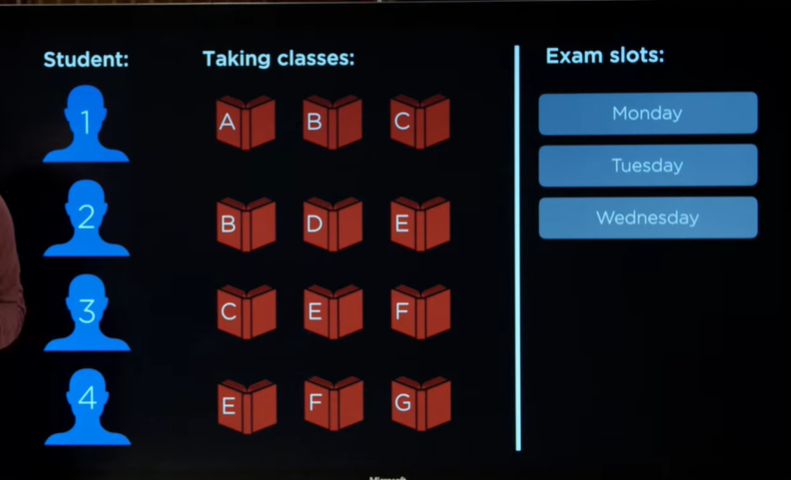

We can have nodes be each class, and an edge representing a constraint between them. 

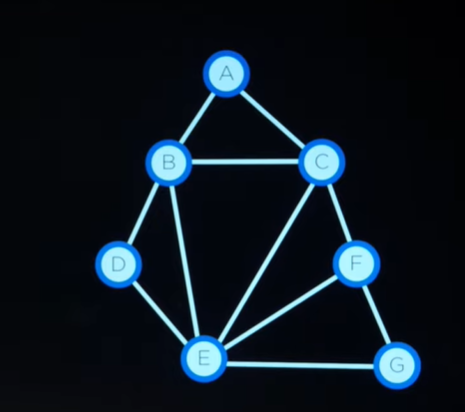*The constraint graph*

- Set of variables $\left\{X_1, X_2, \ldots, X_n\right\}$
- Set of domains for each variable $\left\{D_1, D_2, \ldots, D_n\right\}$
- Set of constraints $C$. 

For example, in Sudoku: 

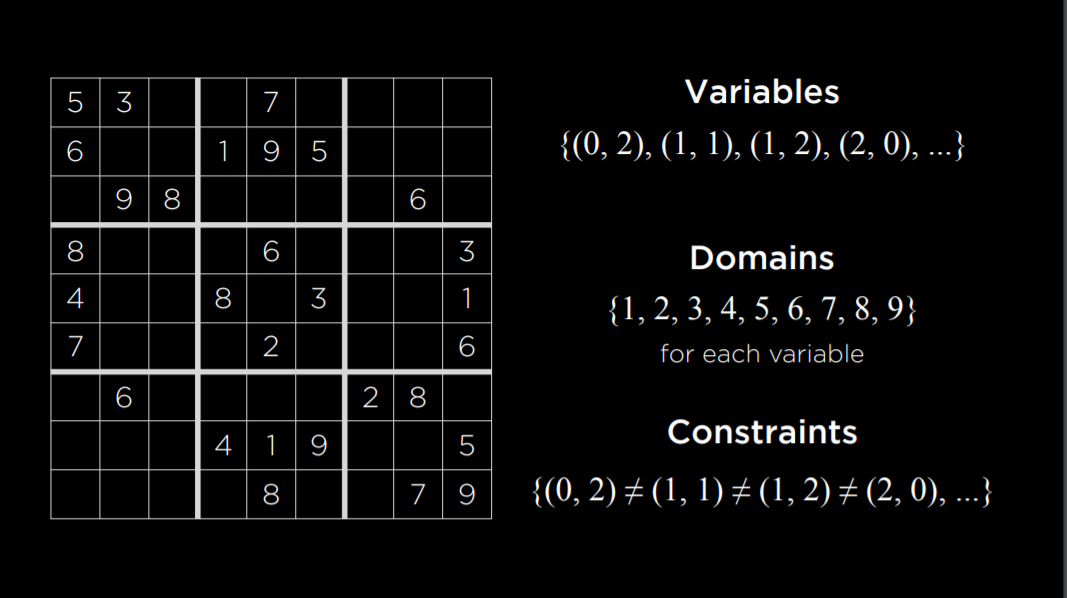

__Hard Constraints__: constraints that must be satisfied in a correct solution
__Soft Constraints__: constraints that express some notion of which solutions are preferred over others

We'll mostly deal with hard constraints. 

__Unary constraint__: Just involved a single variable. For examples $\left\{A\not=Monday\right\}$

__Binary constraint__: Involves 2 variables. For examples, $\left\{A\not=B\right\}$

## Node Consistency

__Node Consistency__: When all the values in a variable's domain satisfy the varible's unary constraints. 

We say a problem or particular node is node consistent. 
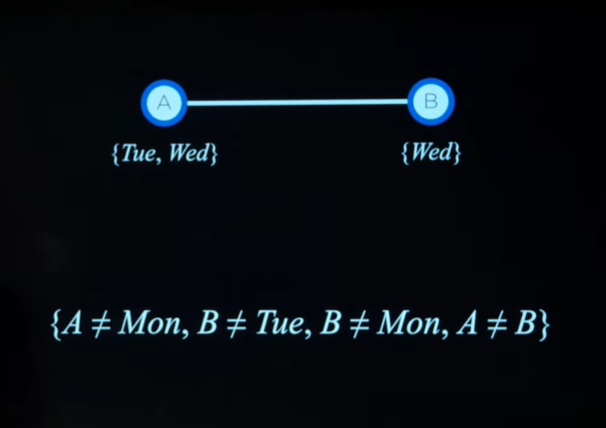

## Arc Consistency

__Arc Consistency__: When all the values in a variable's domain satisfy the variable's binary constraints. 

More perceisely:

To make $X$ arc-consistent with respect to $Y$, remove elemnts from $X$'s domain until every choice for $X$ has a possible choice for $Y$. 

In our image, we already enforced node consistency. Let's try to make $A$ arc consistent WRT to $B$. For example, $Tue$ turns out to be a consistent choice-- there is a $B$ value that's okay. However, if we choose $Wed$ for $A$, then we have no choice for $B$. So, we can remove $Wed$ from $A$'s domain. 
![image.png](attachment:image.png)

```Python
function REVISE(csp, X, Y):
    revised = False  # have we revised $X$'s domain?
    for x in X.domain:
        if no y in Y.domain satisfies constraint for (X, Y):
            delete x from X.domain
            revised = True
    return revised
```

But, we'll want to enforce- not just for 1 arc, but for everything. There's an algorithm for that called AC-3. It maintains a queue.
```Python
function AC-3(csp):
    queue = all arc in csp
    while len(queue) > 0:
        (X, Y) = DEQUEUE(queue)
        if REVISE(csp, X, Y):
            """
            if we DID make a change to X by removing values from X's domain. 
            A node which was previously arc consistent wrt X may no longer be arc consistent wrt X. 
            While there used to be an option we could choose, now there might not be.
            
            If we did remove something, we have some more things to add to the queue
            """
            if len(X.domain) == 0:
                # there's  no way to solve the problem
                return false
            for each Z in (X.neighbors - {Y}):
                ENQUEUE(queue, (Z, X))
    return True
```

Recall search problems are:
- initial state
- actions
- transition model
- goal test
- path cost function

### CSPs as Search Problems:
- Initial state: empty assignment (no variables)
- actions: add a $\left\{variable = value\right\}$ to assignment
- Transition model: shows how adding an assignment changes the assignment.
- Goal test: Check if all variables assigned and constraints are all satisfied
- Path cost function: All paths have same cost. 

However, just doing this is going to be very very ineffecient. 

Switching the order in which we assign variables doesn't really matter. So we have Backtracking Search.

## Backtracking Search
__Backtracking Search__

```Python
function BACKTRACK(assignment={}, csp):
    if assignment complete:
        return assignment
    var = SELECT-UNASSIGNED-VAR(assignment, csp)
    for value in DOMAIN-VALUES(var, assignment, csp):
        if value consistent with assignment:
            add {var = value} to assignment
            result = BACKTRACK(assignment, csp)
            if result is not failure:
                return result
            remove {var = value} from assignment
    return failure
```
> See schedule0.py

> See schedule1.py

We might be able to be a little more intelligent about backtracking.

### Inference
Let's go back to where we first had to backtrack. Our graph was not arc-consistent at that point. Look at $C$, for example:
![image.png](attachment:image.png)
Just by making $C$ arc consistent, we can solve for it's value. If we continue to try to enforce arc consistency, we can see that $E$ must be $Mon$. $D$ must be $Wed$. And so on... Just by enforcing arc consistency, we could solve without backtracking at all. This algorithm is called the Maintaining arc-consistency.

__Maintaining arc-consistency__: algorithm for enforcing arc-consistency every time we make a new assignment. 

Equivalently:

When we make a new assignment to $X$, call the AC-3, starting with a queue of all arcs $(Y, X)$ where $Y$ is a neighbor of $X$.

Our new function:
```Python
function BACKTRACK(assignment={}, csp):
    if assignment complete:
        return assignment
    var = SELECT-UNASSIGNED-VAR(assignment, csp)
    for value in DOMAIN-VALUES(var, assignment, csp):
        if value consistent with assignment:
            add {var = value} to assignment
            inferences = INFERENCE(assignment, csp)  # added code
            if inferences != failure:  # added code
                add inferences to assignment  # added code
            result = BACKTRACK(assignment, csp)
            if result is not failure:
                return result
            remove {var = value} and inferences from assignment  # modified code
    return failure
```

Some of the other hueristics come from some of the other functions. One such function is SELECT-UNASSIGNED-VAR.
#### Select Unassigned Variables Function
- __Minimum remaining values (MRV)__: heuristic: select the variable that has the smallest domain
- __degree__: heuristic: select the variable that has the highest degree

For example, we might've started our search at node $E$, since it has the highest degree. 

#### Domain Values Function
The naive approach is just go in order- Monday, then Tuesday, then Wednesday... Instead, we want to choose most likely values first. 
- __Least-constraining values heurisitic__: return variables in order by number of choices that are ruled out for neighboring variables
    - try least-constraining values first

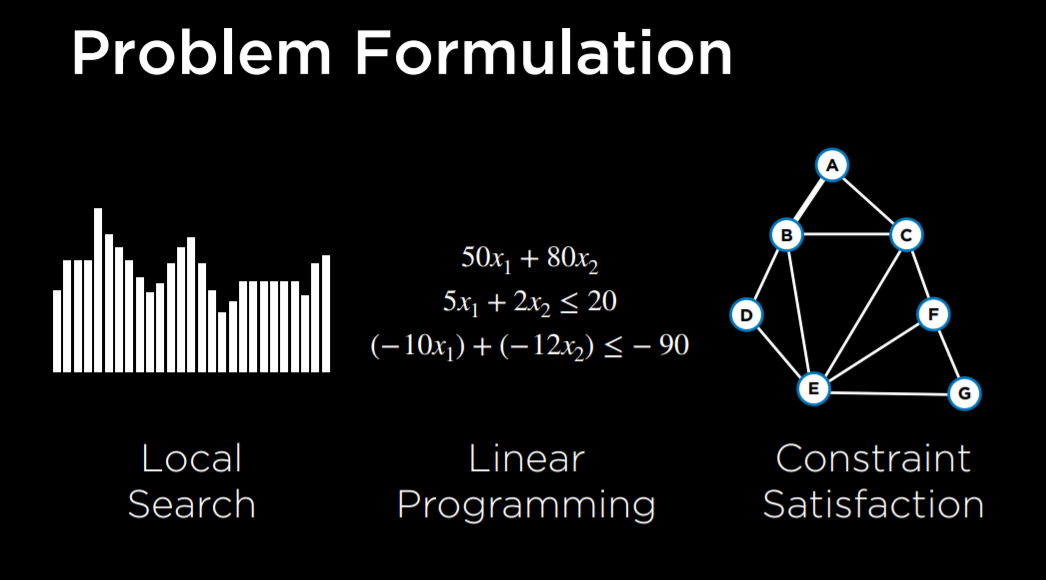